<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [1]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras as keras
import zipfile


**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [2]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [3]:
#dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
#dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))


In [28]:
# get file names
riverDirectory = 'pics/2750/river'
txtFiles = list()
highwayDirectory = 'pics/2750/highway'
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    txtFiles.append(imgFile)

for fileName in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, fileName)
    txtFiles.append(imgFile)
    # print(txtFile)
txtFiles = [files.replace("\\","/") for files in txtFiles]
print(len(txtFiles))
print(txtFiles[2])

5000
pics/2750/river/River_100.jpg


<h3>Data filteren</h3>

In [29]:
#txtFiles = [x for x in txtFiles if ".jpg" in x]

<h3>Data inlezen</h3>

In [30]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])
i = 0

for pic in txtFiles:
    imageObjects[i] = np.asarray(Image.open(txtFiles[i])).astype('uint8')/255
    i += 1
    
print(imageObjects[0])    

[[[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39607843 0.39607843 0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.31372549 0.34901961 0.36862745]
  [0.31764706 0.35294118 0.37254902]]

 [[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39215686 0.4        0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.30980392 0.34509804 0.36470588]
  [0.31372549 0.34901961 0.36862745]]

 [[0.41960784 0.44313725 0.43529412]
  [0.42352941 0.43921569 0.43529412]
  [0.38431373 0.39215686 0.38823529]
  ...
  [0.29019608 0.34509804 0.35686275]
  [0.30196078 0.34509804 0.36078431]
  [0.30196078 0.34509804 0.36078431]]

 ...

 [[0.18039216 0.26666667 0.32156863]
  [0.18039216 0.26666667 0.32156863]
  [0.18431373 0.25882353 0.31764706]
  ...
  [0.21960784 0.32156863 0.3254902 ]
  [0.22352941 0.31764706 0.3254902 ]
  [0.22745098 0.32156863 0.32941176]]

 [[0.17647059 0.2627451  0.31764706]
  [0.17647059 0.2627451  0.31764706]


**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [31]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[1]
    i += 1
    
# print(txtFiles[0])    

In [45]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
print(labelNames)
print(labelNumbers)
print(labelDict)
#np.array(np.unique(labelNumbers, return_counts=True)).T

['2750']
[0 0 0 ... 0 0 0]
{0: '2750'}


<h3>Data splitten</h3>

In [33]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
print(testLabels)
nrOfImages = len(trainSet)
print(nrOfImages)
# Normalize pixel values to be between 0 and 1
# trainSet, testSet = trainSet / 255.0, testSet / 255.0

(3750, 64, 64, 3)
[0 0 0 ... 0 0 0]
3750


<h3>Data inspecteren</h3>

In [34]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 



    plt.show()

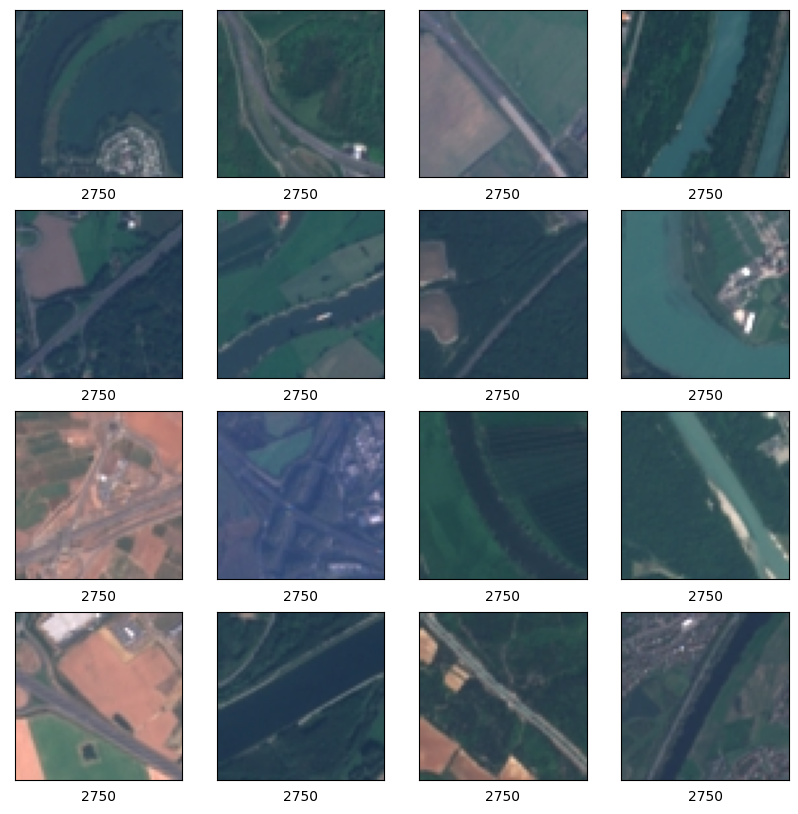

In [11]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [35]:
from turtle import shape

model = tf.keras.models.Sequential([    
tf.keras.layers.Flatten (input_shape = [64, 64, 3]),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='softmax'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(10,)
])


<h3>Definieer de trainparameters</h3>

In [36]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [37]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)

Epoch 1/5
59/59 - 0s - loss: 1.7556 - accuracy: 0.9829 - 356ms/epoch - 6ms/step
Epoch 2/5
59/59 - 0s - loss: 0.5929 - accuracy: 1.0000 - 160ms/epoch - 3ms/step
Epoch 3/5
59/59 - 0s - loss: 0.0820 - accuracy: 1.0000 - 154ms/epoch - 3ms/step
Epoch 4/5
59/59 - 0s - loss: 0.0262 - accuracy: 1.0000 - 155ms/epoch - 3ms/step
Epoch 5/5
59/59 - 0s - loss: 0.0136 - accuracy: 1.0000 - 153ms/epoch - 3ms/step


<h3>Test het model</h3>

In [38]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)



#trainset, testSet, trainlabels testLabels = train_test_split(imageObjects,labelNumbers, stratify = labelNumbers, train_size =0.75, random_state=42
#print(trainset.shape)
#nrOfImages = len(trainset)
#print(nrOfImages)

#history = model.fit(testSet, testLabels, epochs=40, validation_split=0.1, shuffle=True)
#plt.plot(history.history['accuracy'],label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#plt.xlabel('val_accuracy')
#plt.ylabel('Accuracy')
#plt.ylim([0.0,0.8])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(testSet, testLabels, verbose=2)

Epoch 1/5
20/20 - 0s - loss: 0.0097 - accuracy: 1.0000 - 245ms/epoch - 12ms/step
Epoch 2/5
20/20 - 0s - loss: 0.0084 - accuracy: 1.0000 - 57ms/epoch - 3ms/step
Epoch 3/5
20/20 - 0s - loss: 0.0073 - accuracy: 1.0000 - 52ms/epoch - 3ms/step
Epoch 4/5
20/20 - 0s - loss: 0.0065 - accuracy: 1.0000 - 53ms/epoch - 3ms/step
Epoch 5/5
20/20 - 0s - loss: 0.0057 - accuracy: 1.0000 - 51ms/epoch - 3ms/step


<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [39]:
trainset, testSet, trainlabels, testLabels = train_test_split(imageObjects,labelNumbers, stratify = labelNumbers, train_size =0.75, random_state=42)
print(trainset.shape)
nrOfImages = len(trainset)
print(nrOfImages)

(3750, 64, 64, 3)
3750


2750


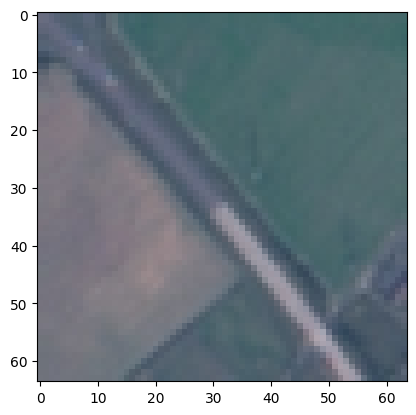

In [41]:
#welke index
i = 2

img = trainSet[i]

print(labelNames[trainLabels[i]])

plt.imshow(img)


In [42]:
predictions = model.predict(testSet)
score = tf.nn.softmax(predictions[1])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labelNames[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to 2750 with a 99.46 percent confidence.


In [19]:
#get predictions
pred = model.predict(testSet, batch_size=16)
pred = np.argmax(pred, axis=-1)
print(pred)
#original labels
labels = np.argmax(testLabels,axis=-1)
# from sklearn.metrics import classification_report
# print(classification_report(labels, pred))
conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=pred)
print(conf_matrix)

[0 0 0 ... 0 0 0]
tf.Tensor([[1250]], shape=(1, 1), dtype=int32)


40/40 - 0s - loss: 0.0069 - accuracy: 1.0000 - 47ms/epoch - 1ms/step


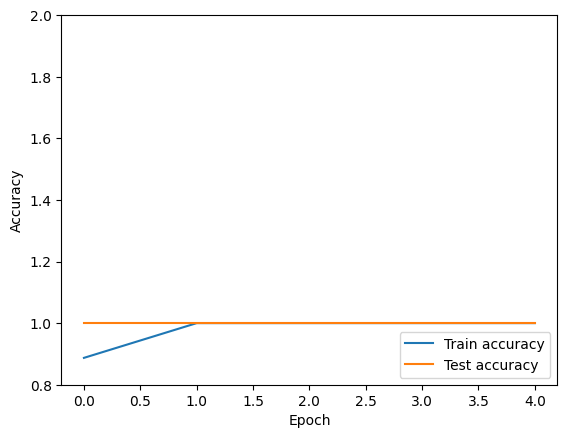

In [22]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history_test.history['accuracy'], label = 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

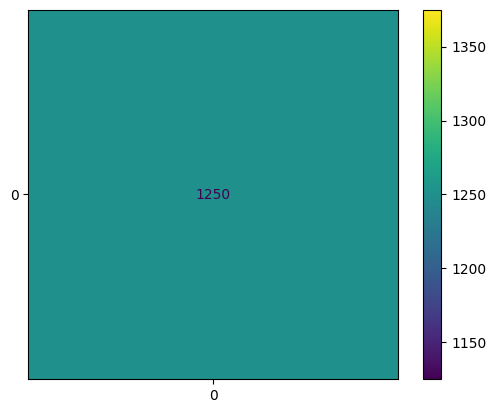

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = testLabels
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Highway', 'River'])

cm_display.plot()
plt.show()